<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/04_05_over_determined_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Over determined System**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH04/CH04_SEC03_1_OverUnderDetermined.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [12, 8]

Minimization using Lambda 1= 0.0   True   Optimization terminated successfully.
Minimization using Lambda 1= 0.1   False   Maximum number of iterations has been exceeded.
Minimization using Lambda 1= 0.5   False   Maximum number of iterations has been exceeded.


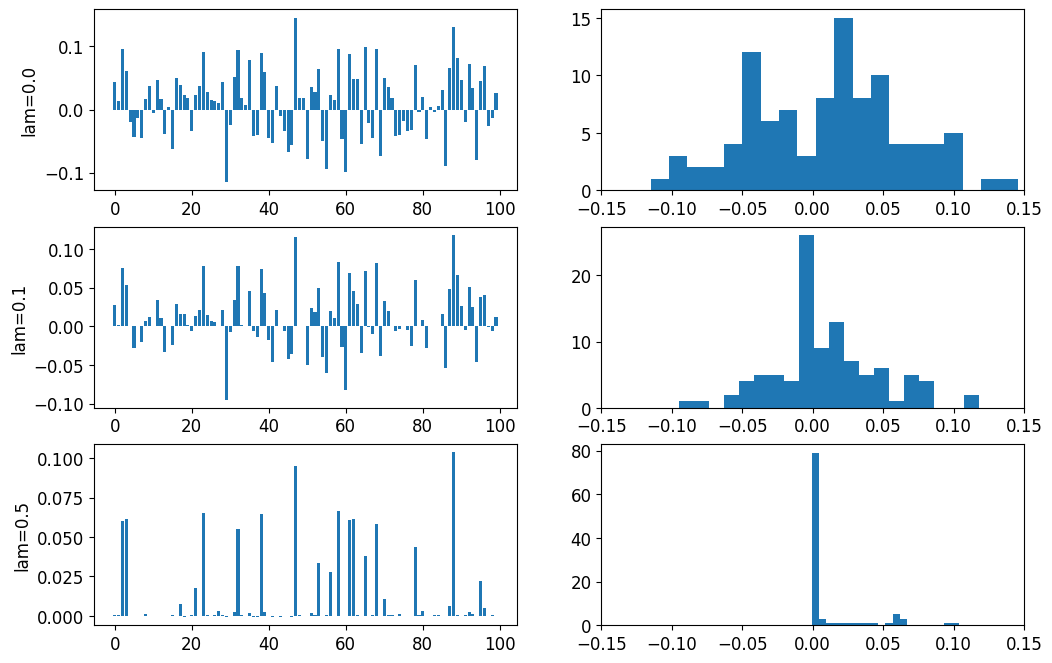

In [2]:
# Over Determined System
# A x = b

n = 500
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

# pinv  : Compute the (Moore-Penrose) pseudo-inverse of a matrix.
xdag = np.linalg.pinv(A)@b

# L1-norm penalty term set to different values
lam = np.array([0, 0.1, 0.5])

################################################################################
# To minimize the error and to enforce a constraint on the solution
# the optimization architecture is implemented in the following form
#       argmin||Ax-b||2 + lambda1*||x||1 + lambda2*||x||2
# For details, please see the slide 18 of the notes.

# The parameter lam (lambda1 in the notes) control the penalization of L1-norm.

def reg_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)

fig,axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm,args=(A,b,lam[j]),x0=xdag, tol=1e-3, options={'maxiter': 100})
    x = res.x
    print("Minimization using Lambda 1=", lam[j], " ", res.success, " ", res.message)
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)

